In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d yasserh/titanic-dataset
!unzip titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 42.2MB/s]
Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [3]:
import pandas as pd


df = pd.read_csv('/content/Titanic-Dataset.csv')


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

df.info()


df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


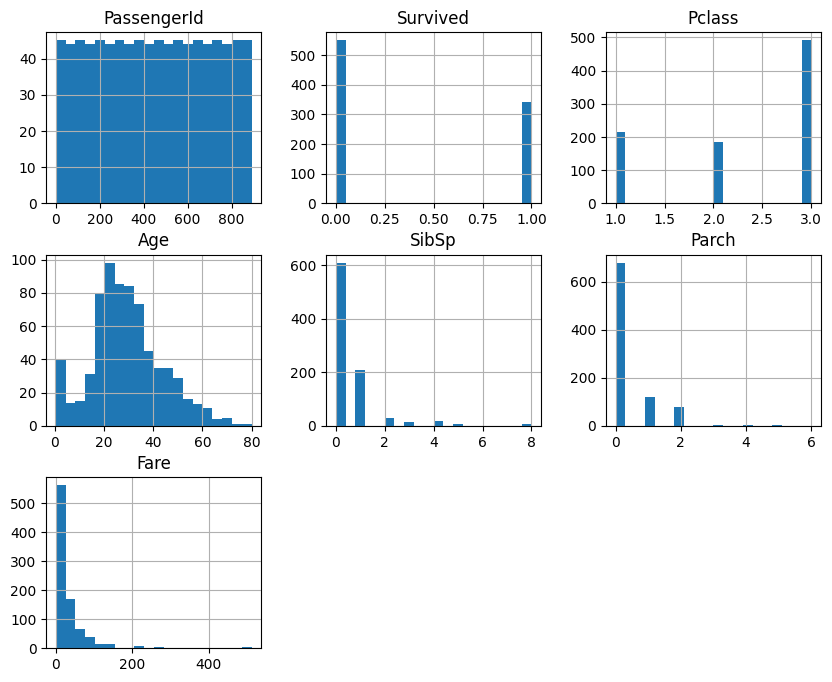

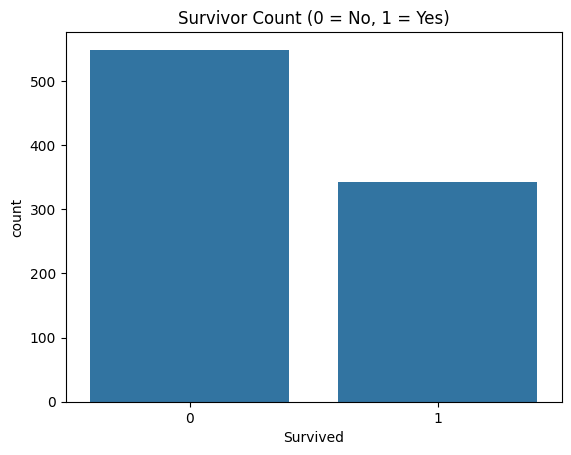

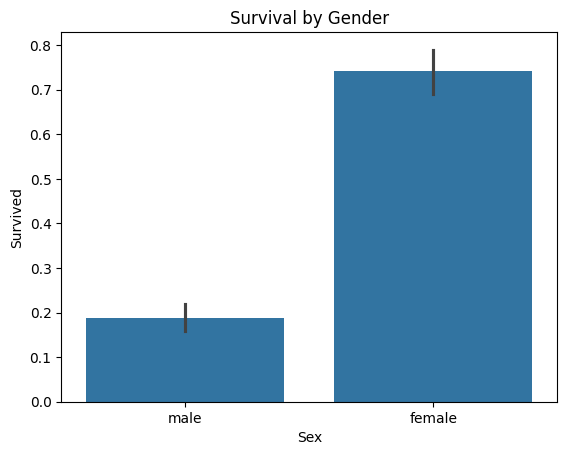

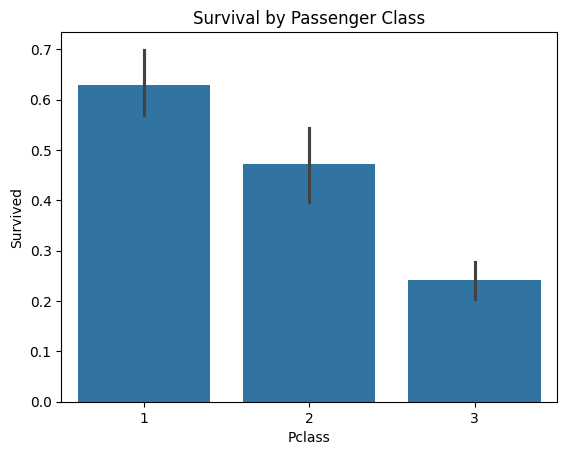

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


missing_values = df.isnull().sum()
print(missing_values)


df.hist(figsize=(10, 8), bins=20)
plt.show()


sns.countplot(data=df, x='Survived')
plt.title('Survivor Count (0 = No, 1 = Yes)')
plt.show()


sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival by Gender')
plt.show()

sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival by Passenger Class')
plt.show()



In [6]:

df.isnull().sum()


df['Age'].fillna(df['Age'].median(), inplace=True)


df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns='Cabin', inplace=True)


df.isnull().sum()


<ipython-input-6-3608d65c8165>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-3608d65c8165>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


<ipython-input-7-8f50283223ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


,Survived,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,1,0,False,True
1,1,1,1,38.0,71.2833,1,0,False,False
2,1,3,1,26.0,7.9250,0,0,False,True
3,1,1,1,35.0,53.1000,1,0,False,True
4,0,3,0,35.0,8.0500,0,0,False,True


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (712, 8)
Testing set size: (179, 8)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Logistic Regression Performance:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC-AUC Score: 0.8002


In [12]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)
roc_auc_dtree = roc_auc_score(y_test, y_pred_dtree)

print(f"Decision Tree Performance:")
print(f"Accuracy: {accuracy_dtree:.4f}")
print(f"Precision: {precision_dtree:.4f}")
print(f"Recall: {recall_dtree:.4f}")
print(f"F1 Score: {f1_dtree:.4f}")
print(f"ROC-AUC Score: {roc_auc_dtree:.4f}")


Decision Tree Performance:
Accuracy: 0.7821
Precision: 0.7397
Recall: 0.7297
F1 Score: 0.7347
ROC-AUC Score: 0.7744


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")


Random Forest Performance:
Accuracy: 0.8156
Precision: 0.7971
Recall: 0.7432
F1 Score: 0.7692
ROC-AUC Score: 0.8050


In [14]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dtree, accuracy_rf],
    'Precision': [precision, precision_dtree, precision_rf],
    'Recall': [recall, recall_dtree, recall_rf],
    'F1 Score': [f1, f1_dtree, f1_rf],
    'ROC-AUC Score': [roc_auc, roc_auc_dtree, roc_auc_rf]
})

print(models)


                 Model  Accuracy  Precision    Recall  F1 Score  ROC-AUC Score
0  Logistic Regression  0.810056   0.785714  0.743243  0.763889       0.800193
1        Decision Tree  0.782123   0.739726  0.729730  0.734694       0.774389
2        Random Forest  0.815642   0.797101  0.743243  0.769231       0.804955
